# Intro

Training Track: Intermediate

Training Title: Machine Learning with Python

Batch No.: JNUCSEP | 01

Name: Kawshik Shankar Ghosh

ID: M230205001

In [ ]:
!pip install scipy

# Problem

1. Data Preprocessing
2. Feature Selection
3. Model Building
4. Model Evaluation
5. Visualization

# Solution

1. Data Preprocessing

In [1]:
# load all library

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [48]:
db=pd.read_csv('/content/stroke.csv')
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     3566 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [49]:
db.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [50]:
# check null value

db.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201
smoking_status,1544


In [51]:
db = db.dropna()

In [52]:
db.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [71]:
db.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000,3426.000000
mean,0.536749,0.119089,0.060128,0.245600,0.233417,0.052539
std,0.261823,0.323941,0.237759,0.220218,0.090633,0.223145
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000,0.102103,0.171429,0.000000
50%,0.555556,0.000000,0.000000,0.171914,0.218634,0.000000
75%,0.736111,0.000000,0.000000,0.282003,0.280745,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
db.head(5)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [75]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

label_encoders = {}

for col in columns_to_encode:
    le = LabelEncoder()
    db[col] = le.fit_transform(db[col])
    label_encoders[col] = le
db.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.791667,0.0,1.0,1,2,1,0.801265,0.311801,0,1.0
2,1,0.972222,0.0,1.0,1,2,0,0.234512,0.260870,1,1.0
3,0,0.541667,0.0,0.0,1,2,1,0.536008,0.284472,2,1.0
4,0,0.958333,1.0,0.0,1,3,0,0.549349,0.155280,1,1.0
5,1,0.986111,0.0,0.0,1,2,1,0.605161,0.217391,0,1.0


In [76]:
#Scaling
from sklearn.preprocessing import StandardScaler
numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
db[numerical_columns] = scaler.fit_transform(db[numerical_columns])
db.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.973768,-0.367680,3.953615,1,2,1,2.523621,0.864982,0,1.0
2,1,1.663479,-0.367680,3.953615,1,2,0,-0.050358,0.302945,1,1.0
3,0,0.018784,-0.367680,-0.252933,1,2,1,1.318923,0.563401,2,1.0
4,0,1.610424,2.719753,-0.252933,1,3,0,1.379514,-0.862253,1,1.0
5,1,1.716533,-0.367680,-0.252933,1,2,1,1.632992,-0.176842,0,1.0


2. Feature Selection

In [77]:
# Using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = db.drop(columns=['stroke'])
model = LogisticRegression(max_iter=10000)
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
selected_features

Index(['age', 'hypertension', 'ever_married', 'avg_glucose_level',
       'smoking_status'],
      dtype='object')

3. Model Building & Accuracy

In [79]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {knn_accuracy * 100:.2f}%")

KNN Model Accuracy: 93.15%


In [59]:
knn = KNeighborsClassifier(n_neighbors=95)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {100*_accuracy:.2f}%")

Accuracy: 93.59%


In [82]:
#SVC using RBF karnel

from sklearn.svm import SVC
svm_model = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Model Accuracy: {svm_accuracy * 100:.2f}%")
#RBF kernel is used for modeling non-linear relationships

SVM Model Accuracy: 93.59%


4. Model Evaluation

In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred) * 100,
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
    }
    return metrics

# Evaluate KNN
knn_metrics = evaluate_model(knn, X_test, y_test)

# Evaluate SVM
svm_metrics = evaluate_model(svm_model, X_test, y_test)

# Comparison
print("KNN Model Performance:")
for metric, value in knn_metrics.items():
    print(f"{metric}: {value:.2f}")

print("\nSVM Model Performance:")
for metric, value in svm_metrics.items():
    print(f"{metric}: {value:.2f}")


KNN Model Performance:
Accuracy: 93.15
Precision: 0.20
Recall: 0.02
F1 Score: 0.04

SVM Model Performance:
Accuracy: 93.59
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


5. Results Visualization

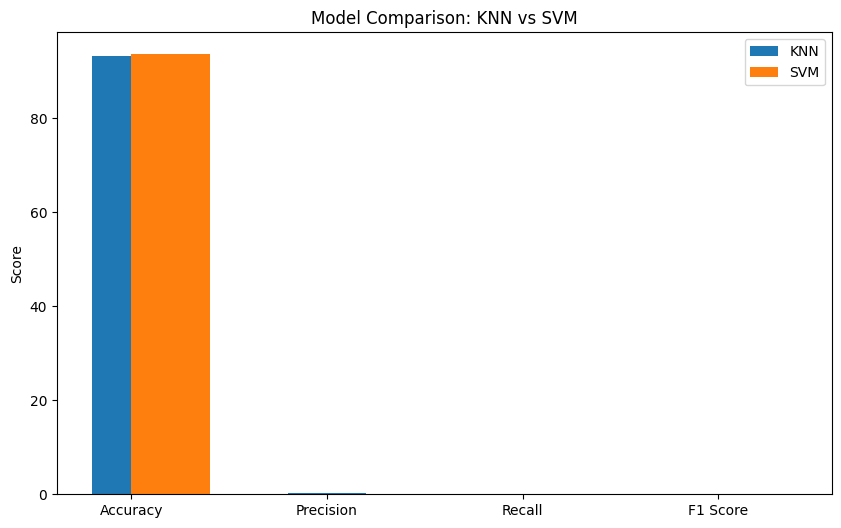

In [90]:
# Bar graph
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_metrics_comparison(knn_metrics, svm_metrics):
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

    knn_values = [knn_metrics[metric] for metric in metrics]
    svm_values = [svm_metrics[metric] for metric in metrics]

    x = range(len(metrics))
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.bar(x, knn_values, width=0.4, label='KNN', align='center')
    ax.bar(x, svm_values, width=0.4, label='SVM', align='edge')

    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.set_ylabel('Score')
    ax.set_title('Model Comparison: KNN vs SVM')
    ax.legend()

    plt.show()

plot_metrics_comparison(knn_metrics, svm_metrics)


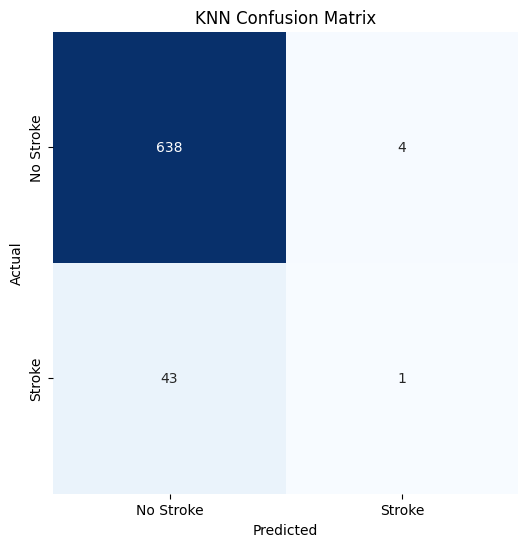

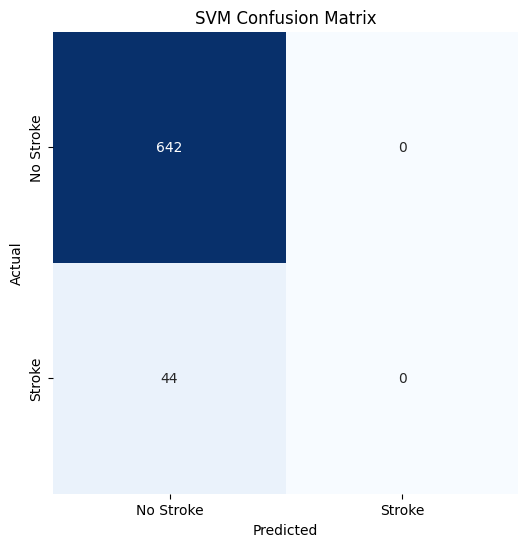

In [91]:
# Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


y_pred_knn = knn.predict(X_test)
plot_confusion_matrix(y_test, y_pred_knn, 'KNN')

y_pred_svm = svm_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')
